In [100]:
import numpy as np
import pandas as pd
import re
pd.set_option('display.max_rows', 200)
from env import api_token

## Note for the team:
### This notebook is a mess. I would not try to run it if I were you.

In [101]:
import lyricsgenius as genius
def get_lyrics(title, artist):
    api = genius.Genius(api_token, verbose=False)
    song = api.search_song(title, artist)
    lyrics = song.lyrics.replace('\n', ' ')
    return lyrics

In [102]:
df = pd.read_csv('songs.csv').drop(columns=['Unnamed: 0'])

In [103]:
df = df[df.lyrics.isna()]
df = df.drop(columns=['status'])

### title_2 = remove special characters and numbers
### artist_2 = remove special characters

In [104]:
df['title_2'] = df.title.str.replace('.', ' ')
df['title_2'] = df.title_2.str.replace(r'[^a-zA-Z\s\:]', '', regex=True)
df['artist_2'] = df.artist.str.replace(r'[^a-zA-Z0-9\s\:]', '', regex=True)
df.index = range(len(df))

/var/folders/zb/3lg9b5xn3831bhkh23bd5bs00000gn/T/ipykernel_23210/4312783.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['title_2'] = df.title.str.replace('.', ' ')


In [105]:
df

,title,artist,date,lyrics,title_2,artist_2
0,"""B"" Girls",Young And Restless,1990-05-05,NaN,B Girls,Young And Restless
1,"""Cherry Cherry"" from Hot August Night",Neil Diamond,1973-03-17,NaN,Cherry Cherry from Hot August Night,Neil Diamond
2,"""Having A Party"" Medley",The Ovations (Featuring Louis Williams),1973-10-13,NaN,Having A Party Medley,The Ovations Featuring Louis Williams
3,"""Yep!""",Duane Eddy His Twangy Guitar And The Rebels,1959-03-30,NaN,Yep,Duane Eddy His Twangy Guitar And The Rebels
4,'98 Thug Paradise,"Tragedy, Capone, Infinite",1998-09-19,NaN,Thug Paradise,Tragedy Capone Infinite
...,...,...,...,...,...,...
1912,pride.is.the.devil,J. Cole & Lil Baby,2021-05-29,NaN,pride is the devil,J Cole Lil Baby
1913,punchin'.the.clock,J. Cole,2021-05-29,NaN,punchin the clock,J Cole
1914,the.climb.back,J. Cole,2021-05-29,NaN,the climb back,J Cole
1915,transparentsoul,Willow Featuring Travis Barker,2021-06-26,NaN,transparentsoul,Willow Featuring Travis Barker


In [106]:
# title_2 and artist_2

for i in range(len(df)):
    
    title = df.iloc[[i]].title_2.values[0]
    artist = df.iloc[[i]].artist_2.values[0]
    
    try:
        df.loc[i, 'lyrics'] = get_lyrics(title, artist)
        df.loc[i, 'error'] = False
    except: 
        df.loc[i, 'error'] = True
    
    if i % 100 == 0:
        df.to_csv('songs_2.csv')
    
    print(f'{round((i / len(df) * 100), 2)}%\t complete', end='\r')
    
    df.to_csv('songs_2.csv')

In [107]:
df.error.value_counts()

True     1790
False     127
Name: error, dtype: int64

In [285]:
df = pd.read_csv('songs_2.csv').drop(columns=['Unnamed: 0'])
df = df[df.lyrics.isna()]
df.index = range(len(df))

### title_3 = everything inside quotations

In [286]:
df['title_3'] = df.title.str.extract(r'\"(.*)\"')

In [287]:
# title_3 and artist_2

for i in range(len(df)):   
    
    # if title_3 is not null
    if ~df.iloc[[i]].title_3.isna().values[0]:
    
        title = df.iloc[[i]].title_3.values[0]
        artist = df.iloc[[i]].artist_2.values[0]

        try:
            df.loc[i, 'lyrics'] = get_lyrics(title, artist)
            df.loc[i, 'error'] = False
        except: 
            df.loc[i, 'error'] = True

        if i % 100 == 0:
            df.to_csv('songs_3.csv')
    
    print(f'{round((i / len(df) * 100), 2)}%\t complete', end='\r')
    
    df.to_csv('songs_3.csv')

In [288]:
df.error.value_counts()

True     1744
False      46
Name: error, dtype: int64

In [236]:
df = pd.read_csv('songs_3.csv').drop(columns=['Unnamed: 0'])

In [237]:
df = df[df.lyrics.isna()]
df.index = range(len(df.index))
df.shape

(1754, 8)

### artist_3 = remove everything after "Feat"

In [238]:
df['artist_3'] = df.artist_2.str.extract(r'(.+)Feat')

In [242]:
# title_2, artist_3

for i in range(len(df)):   
    
    # if artist_3 is not null
    if ~df.iloc[[i]].artist_3.isna().values[0]:
    
        title = df.iloc[[i]].title_2.values[0]
        artist = df.iloc[[i]].artist_3.values[0]

        try:
            df.loc[i, 'lyrics'] = get_lyrics(title, artist)
            df.loc[i, 'error'] = False
        except: 
            df.loc[i, 'error'] = True

        if i % 100 == 0:
            df.to_csv('songs_4.csv')
    
    print(f'{round((i / len(df) * 100), 2)}%\t complete', end='\r')
    
    df.to_csv('songs_4.csv')

In [271]:
df = pd.read_csv('songs_4.csv').drop(columns=['Unnamed: 0'])

In [272]:
df = df[~df.lyrics.isna()]
df.index = range(len(df))

In [273]:
df.shape

(188, 9)

### artist_4 = remove everything after "With"

In [274]:
df['artist_4'] = df.artist_2.str.extract(r'(.+)With')

In [275]:
# title_2, artist_4

for i in range(len(df)):   
    
    # if artist_4 is not null
    if ~df.iloc[[i]].artist_4.isna().values[0]:
    
        title = df.iloc[[i]].title_2.values[0]
        artist = df.iloc[[i]].artist_4.values[0]

        try:
            df.loc[i, 'lyrics'] = get_lyrics(title, artist)
            df.loc[i, 'error'] = False
        except: 
            df.loc[i, 'error'] = True

        if i % 100 == 0:
            df.to_csv('songs_5.csv', index=False)
    
    print(f'{round((i / len(df) * 100), 2)}%\t complete', end='\r')
    
    df.to_csv('songs_5.csv', index=False)

In [276]:
df.error.value_counts()

False    188
Name: error, dtype: int64

In [277]:
df

,title,artist,date,lyrics,title_2,artist_2,error,title_3,artist_3,artist_4
0,"""Having A Party"" Medley",The Ovations (Featuring Louis Williams),1973-10-13,Big Red Son LyricsTHE AMERICAN ACADEMY of Emer...,Having A Party Medley,The Ovations Featuring Louis Williams,False,Having A Party,The Ovations,NaN
1,***Flawless,Beyonce Featuring Nicki Minaj Or Chimamanda Ng...,2014-09-13,***Flawless Lyrics[Intro: Star Search excerpt]...,Flawless,Beyonce Featuring Nicki Minaj Or Chimamanda Ng...,False,NaN,Beyonce,NaN
2,Ain't No Nigga/Dead Presidents,Jay-Z Featuring Foxxy Brown,1996-04-06,Tay Roc vs. Brizz Rawsteen Lyrics[Round 1: Tay...,Aint No NiggaDead Presidents,JayZ Featuring Foxxy Brown,False,NaN,JayZ,NaN
3,All Cried Out,Lisa Lisa And Cult Jam With Full Force Featuri...,1986-07-26,All Cried Out Lyrics[Verse 1] All alone on a S...,All Cried Out,Lisa Lisa And Cult Jam With Full Force Featuri...,False,NaN,Lisa Lisa And Cult Jam With Full Force,Lisa Lisa And Cult Jam
4,All My Life,Linda Ronstadt (Featuring Aaron Neville),1990-02-10,All My Life LyricsAm I really here in your arm...,All My Life,Linda Ronstadt Featuring Aaron Neville,False,NaN,Linda Ronstadt,NaN
5,All Nite,Entouch Featuring Keith Sweat,1990-01-13,Innere Altmark Lyrics[Intro: Sample] Warum mac...,All Nite,Entouch Featuring Keith Sweat,False,NaN,Entouch,NaN
6,All These N**gas,King Von Featuring Lil Durk,2020-11-21,August 2020 Singles Release Calendar Lyrics8/1...,All These Ngas,King Von Featuring Lil Durk,False,NaN,King Von,NaN
7,Almost Like Praying,Lin-Manuel Miranda Featuring Artists For Puert...,2017-10-28,Almost Like Praying LyricsClick here to donate...,Almost Like Praying,LinManuel Miranda Featuring Artists For Puerto...,False,NaN,LinManuel Miranda,NaN
8,Am I Losing You,The Partridge Family Starring Shirley Jones Fe...,1972-04-01,SCP Series LyricsList of SCPs 001 to 099 SCP...,Am I Losing You,The Partridge Family Starring Shirley Jones Fe...,False,NaN,The Partridge Family Starring Shirley Jones,NaN
9,Arms Around You,XXXTENTACION x Lil Pump Featuring Maluma & Swa...,2018-11-10,"11:55 LyricsMay 29, 2019 Update Cross Me - Ed ...",Arms Around You,XXXTENTACION x Lil Pump Featuring Maluma Swae...,False,NaN,XXXTENTACION x Lil Pump,NaN


In [283]:
songs = pd.read_csv('songs.csv').drop(columns=['Unnamed: 0'])
songs = songs[~songs.lyrics.isna()]
songs.head()

,title,artist,date,status,lyrics
3,"""Joy"" Pt. I",Isaac Hayes,1973-12-22,lyrics acquired,"12/12 Songs LyricsAAlex Turner - ""Stuck on the..."
4,"""Roots"" Medley",Quincy Jones,1977-03-05,lyrics acquired,Ulysses (Chap. 15 - Circe) LyricsThe Mabbot st...
6,#1,Nelly,2001-10-20,lyrics acquired,#1 LyricsUh uh uh I just gotta bring it to the...
7,#1 Dee Jay,Goody Goody,1978-11-18,lyrics acquired,Lbo3d l’akhar LyricsVerse 1: (Omar Cravate) B...
8,#9 Dream,John Lennon,1974-12-21,lyrics acquired,#9 Dream Lyrics[Verse 1] So long ago Was it in...


In [282]:
songs_2 = pd.read_csv('songs_2.csv').drop(columns=['Unnamed: 0'])
songs_2 = songs_2[~songs_2.lyrics.isna()]
songs_2.head()

,title,artist,date,lyrics,title_2,artist_2,error
0,"""B"" Girls",Young And Restless,1990-05-05,"“B” Girls Lyrics[Intro] Hey, Slim. Come here, ...",B Girls,Young And Restless,False
4,'98 Thug Paradise,"Tragedy, Capone, Infinite",1998-09-19,My Rap CD Collection LyricsA - Hempstead High...,Thug Paradise,Tragedy Capone Infinite,False
11,(He's) The Great Impostor,The Fleetwoods,1961-09-11,"(He’s) The Great Imposter LyricsWell, I went a...",Hes The Great Impostor,The Fleetwoods,False
40,...Baby One More Time,Britney Spears,1998-11-21,"...Baby One More Time Lyrics[Intro] Oh, baby, ...",Baby One More Time,Britney Spears,False
41,1-4-All-4-1,East Coast Family,1992-08-22,MotownPhilly Lyrics[Intro: All] Boyz II Men Bo...,All,East Coast Family,False


In [290]:
songs_3 = pd.read_csv('songs_3.csv').drop(columns=['Unnamed: 0'])
songs_3 = songs_3[~songs_3.lyrics.isna()]
songs_3.head()

,title,artist,date,lyrics,title_2,artist_2,error,title_3
0,"""Cherry Cherry"" from Hot August Night",Neil Diamond,1973-03-17,"Cherry, Cherry LyricsBaby loves me, yes, yes s...",Cherry Cherry from Hot August Night,Neil Diamond,False,Cherry Cherry
1,"""Having A Party"" Medley",The Ovations (Featuring Louis Williams),1973-10-13,Dear White People Screenplay Lyrics1 NEWS BROA...,Having A Party Medley,The Ovations Featuring Louis Williams,False,Having A Party
31,(You Make Me Feel Like) A Natural Woman (From ...,Mary J. Blige,1995-10-28,Three Lyrics[Chorus: Girl & Akinyele] Who you ...,You Make Me Feel Like A Natural Woman From New...,Mary J Blige,False,New York Undercover
46,"A Girl Like You (From ""Empire Records"")",Edwyn Collins,1995-10-28,The Arrogance of Nations Lyrics ...,A Girl Like You From Empire Records,Edwyn Collins,False,Empire Records
61,"A Thin Line Between Love & Hate (From ""A Thin ...",H-Town,1996-02-17,A Thin Line Between Love & Hate Lyrics[Verse 1...,A Thin Line Between Love Hate From A Thin Lin...,HTown,False,A Thin Line...


In [292]:
songs_4 = pd.read_csv('songs_4.csv').drop(columns=['Unnamed: 0'])
songs_4 = songs_4[~songs_4.lyrics.isna()]
songs_4.head()

,title,artist,date,lyrics,title_2,artist_2,error,title_3,artist_3
0,"""Having A Party"" Medley",The Ovations (Featuring Louis Williams),1973-10-13,Big Red Son LyricsTHE AMERICAN ACADEMY of Emer...,Having A Party Medley,The Ovations Featuring Louis Williams,False,Having A Party,The Ovations
33,***Flawless,Beyonce Featuring Nicki Minaj Or Chimamanda Ng...,2014-09-13,***Flawless Lyrics[Intro: Star Search excerpt]...,Flawless,Beyonce Featuring Nicki Minaj Or Chimamanda Ng...,False,NaN,Beyonce
71,Ain't No Nigga/Dead Presidents,Jay-Z Featuring Foxxy Brown,1996-04-06,Tay Roc vs. Brizz Rawsteen Lyrics[Round 1: Tay...,Aint No NiggaDead Presidents,JayZ Featuring Foxxy Brown,False,NaN,JayZ
83,All Cried Out,Lisa Lisa And Cult Jam With Full Force Featuri...,1986-07-26,Chapter 8 Lyrics ...,All Cried Out,Lisa Lisa And Cult Jam With Full Force Featuri...,False,NaN,Lisa Lisa And Cult Jam With Full Force
86,All My Life,Linda Ronstadt (Featuring Aaron Neville),1990-02-10,All My Life LyricsAm I really here in your arm...,All My Life,Linda Ronstadt Featuring Aaron Neville,False,NaN,Linda Ronstadt


In [294]:
songs_5 = pd.read_csv('songs_5.csv')
songs_5 = songs_5[~songs_5.lyrics.isna()]
songs_5.head()

,title,artist,date,lyrics,title_2,artist_2,error,title_3,artist_3,artist_4
0,"""Having A Party"" Medley",The Ovations (Featuring Louis Williams),1973-10-13,Big Red Son LyricsTHE AMERICAN ACADEMY of Emer...,Having A Party Medley,The Ovations Featuring Louis Williams,False,Having A Party,The Ovations,NaN
1,***Flawless,Beyonce Featuring Nicki Minaj Or Chimamanda Ng...,2014-09-13,***Flawless Lyrics[Intro: Star Search excerpt]...,Flawless,Beyonce Featuring Nicki Minaj Or Chimamanda Ng...,False,NaN,Beyonce,NaN
2,Ain't No Nigga/Dead Presidents,Jay-Z Featuring Foxxy Brown,1996-04-06,Tay Roc vs. Brizz Rawsteen Lyrics[Round 1: Tay...,Aint No NiggaDead Presidents,JayZ Featuring Foxxy Brown,False,NaN,JayZ,NaN
3,All Cried Out,Lisa Lisa And Cult Jam With Full Force Featuri...,1986-07-26,All Cried Out Lyrics[Verse 1] All alone on a S...,All Cried Out,Lisa Lisa And Cult Jam With Full Force Featuri...,False,NaN,Lisa Lisa And Cult Jam With Full Force,Lisa Lisa And Cult Jam
4,All My Life,Linda Ronstadt (Featuring Aaron Neville),1990-02-10,All My Life LyricsAm I really here in your arm...,All My Life,Linda Ronstadt Featuring Aaron Neville,False,NaN,Linda Ronstadt,NaN


In [297]:
df = pd.concat([songs, songs_2, songs_3, songs_4, songs_5])

In [299]:
df.shape

(28313, 11)

In [324]:
df.index = range(len(df))

In [375]:
from nltk.corpus import stopwords
def remove_stopwords(text, stopword_list=stopwords.words('english')):
    words = text.split()
    filtered_words = [word for word in words if word not in stopword_list]
    return ' '.join(filtered_words)

In [376]:
# pull the title portion out of the lyrics string
df['test_title'] = df.lyrics.str.extract(r'(.+)Lyrics')
# clean it up
df['test_title'] = df.test_title.str.lower()
df['test_title'] = df.test_title.str.replace(r'[^a-zA-Z\s\:]', '', regex=True)
df['test_title'] = df.test_title.str.strip()
df['test_title'] = df.test_title.apply(remove_stopwords)
# clean up the title to match the test title
df['clean_title'] = df.title.str.replace(r'[^a-zA-Z\s\:]', '', regex=True)
df['clean_title'] = df.clean_title.str.strip()
df['clean_title'] = df.clean_title.str.lower()
df['clean_title'] = df.clean_title.apply(remove_stopwords)


In [397]:
df.head(1)

,title,artist,date,status,lyrics,title_2,artist_2,error,title_3,artist_3,artist_4,test_lyrics,test_title,clean_title
0,"""Joy"" Pt. I",Isaac Hayes,1973-12-22,lyrics acquired,"12/12 Songs LyricsAAlex Turner - ""Stuck on the...",NaN,NaN,NaN,NaN,NaN,NaN,12/12 Songs,songs,joy pt


<AxesSubplot:xlabel='date', ylabel='Count'>

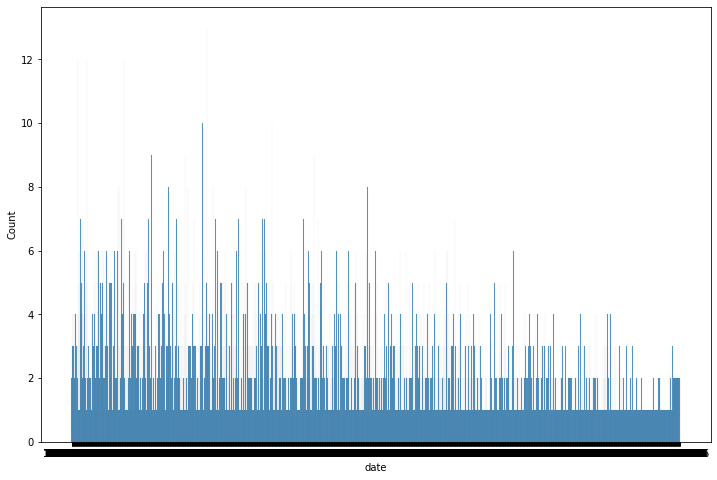

In [389]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.histplot(df[df.clean_title != df.test_title].date)

<AxesSubplot:xlabel='date', ylabel='Count'>

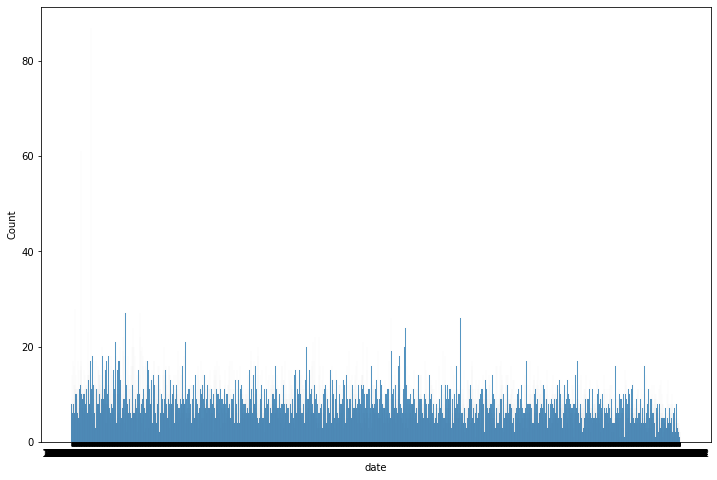

In [392]:
plt.figure(figsize=(12,8))
sns.histplot(df.date)

In [400]:
songs_0526 = df[df.clean_title == df.test_title]
songs_0526 = songs_0526[['title', 'artist', 'date', 'lyrics']]
songs_0526.to_csv('songs_0526.csv')